# Hotel Booking Demand Cancelation
- **Nama:** Pandu Persada Tanjung
- **Email:** pandupersada73@gmail.com
- **ID Dicoding:** pandupt

## Domain Proyek

Hotel menghadapi tantangan besar terkait *booking cancellation*. Setiap pembatalan berpengaruh pada perencanaan operasional dan revenue management. Oleh karena itu, penting untuk membangun sistem prediksi apakah pemesanan akan dibatalkan atau tidak.

## Business Understanding

### Problem Statement
Bagaimana cara memprediksi apakah suatu reservasi hotel akan dibatalkan atau tidak berdasarkan informasi pemesanan dan profil pelanggan?

### Goals
Membangun model klasifikasi yang mampu memprediksi pembatalan reservasi hotel.

Metrik evaluasi utama: **Accuracy**, **Precision**, **Recall**, dan **F1-score**

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DBS/hotel-demand-booking/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape, df.columns.tolist()

((119390, 32),
 ['hotel',
  'is_canceled',
  'lead_time',
  'arrival_date_year',
  'arrival_date_month',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'reserved_room_type',
  'assigned_room_type',
  'booking_changes',
  'deposit_type',
  'agent',
  'company',
  'days_in_waiting_list',
  'customer_type',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests',
  'reservation_status',
  'reservation_status_date'])

In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_num.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Understanding

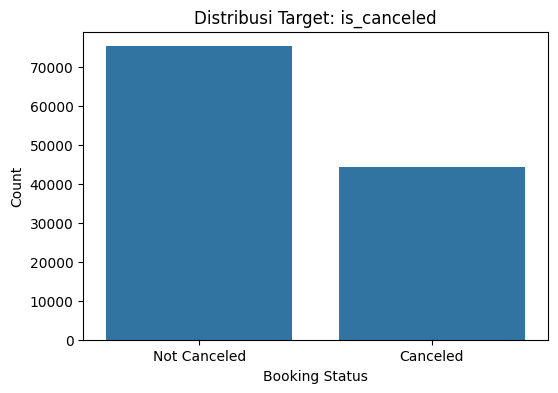

In [ ]:
# Visualisasi distribusi target (is_canceled)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_canceled')
plt.title('Distribusi Target: is_canceled')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

Grafik di atas menunjukkan bahwa data tidak seimbang, dengan mayoritas pemesanan tidak dibatalkan (is_canceled = 0). Ini penting untuk dipertimbangkan dalam proses modeling agar model tidak bias terhadap kelas mayoritas.

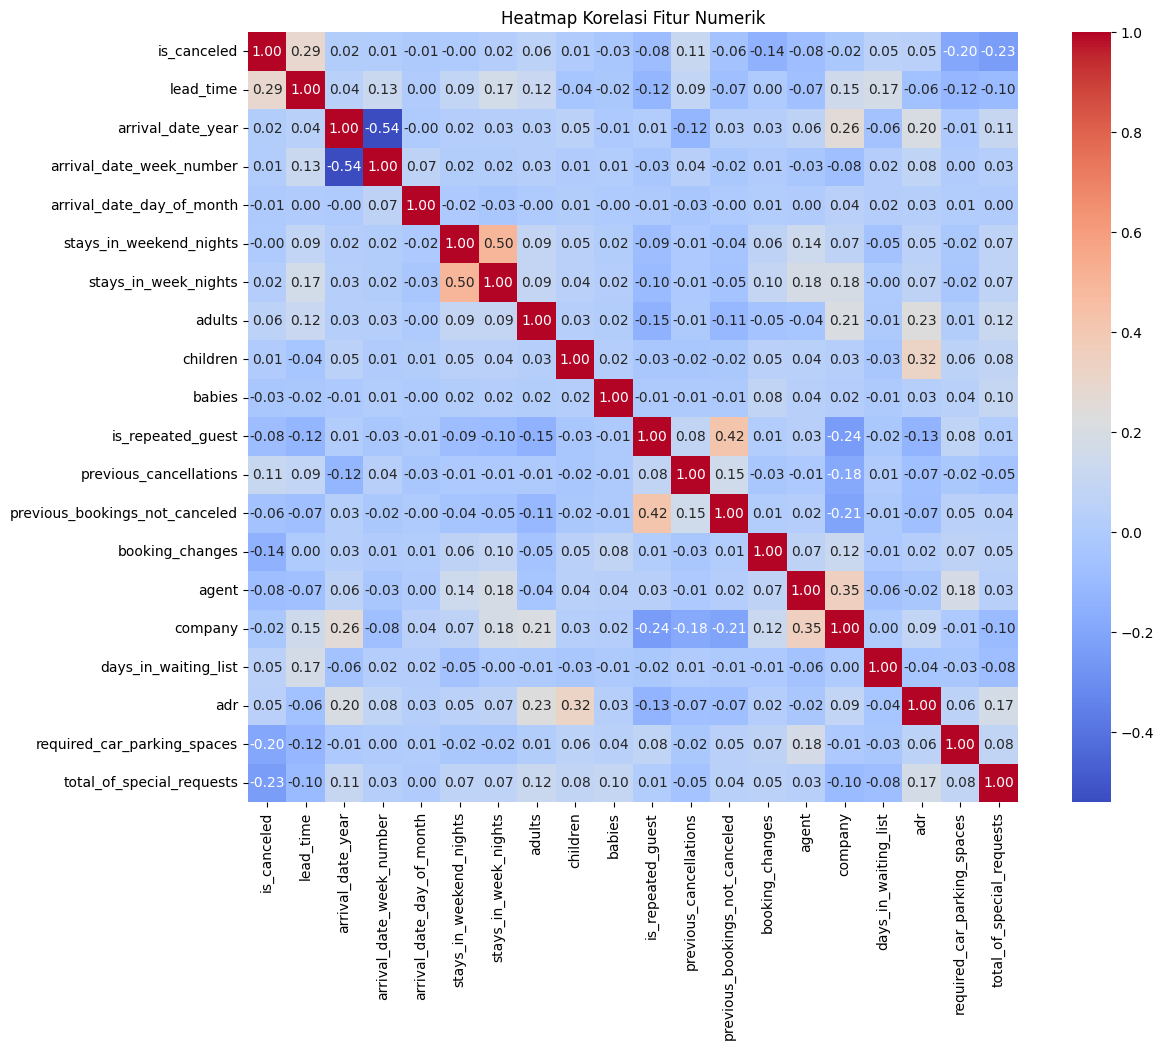

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Heatmap di atas menunjukkan korelasi antar fitur numerik. Beberapa insight penting:

is_canceled memiliki korelasi positif cukup tinggi dengan:

*   lead_time (semakin lama waktu tunggu, makin tinggi kemungkinan pembatalan)
*   previous_cancellations

Korelasi negatif terlihat dengan:

*   total_of_special_requests dan booking_changes, menandakan bahwa tamu yang benar-benar berniat datang cenderung lebih aktif dalam melakukan permintaan atau perubahan pemesanan

Cek missing values

In [ ]:
# Salin dataframe agar tidak merusak aslinya
df_prep = df.copy()

# Cek missing values
missing = df_prep.isnull().sum()
missing[missing > 0]

,0
children,4
country,488
agent,16340
company,112593


Beberapa kolom memiliki missing values:

*   children: hanya 4 baris → bisa diisi dengan median
*   country: 488 baris → bisa diisi dengan modus (negara terbanyak)
*   agent: 16 ribu lebih missing → bisa dianggap sebagai "tanpa agen" (isi 0)
*   company: hampir semua kosong → bisa dibuang karena tidak informatif

Isi nilai yang kosong pada beberapa fitur

In [ ]:
df_prep['children'] = df_prep['children'].fillna(df_prep['children'].median())
df_prep['country'] = df_prep['country'].fillna(df_prep['country'].mode()[0])
df_prep['agent'] = df_prep['agent'].fillna(0)

Drop fitur karena mayoritas kosong

In [ ]:
df_prep.drop(columns=['company'], inplace=True)

Cek duplikasi data

In [ ]:
# Cek duplikasi data
df_prep.duplicated().sum()

np.int64(32020)

In [ ]:
df_prep[df_prep.duplicated()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08


In [ ]:
df_prep = df_prep.drop_duplicates()

In [ ]:
df_prep.duplicated().sum()

np.int64(0)

Cek outlier

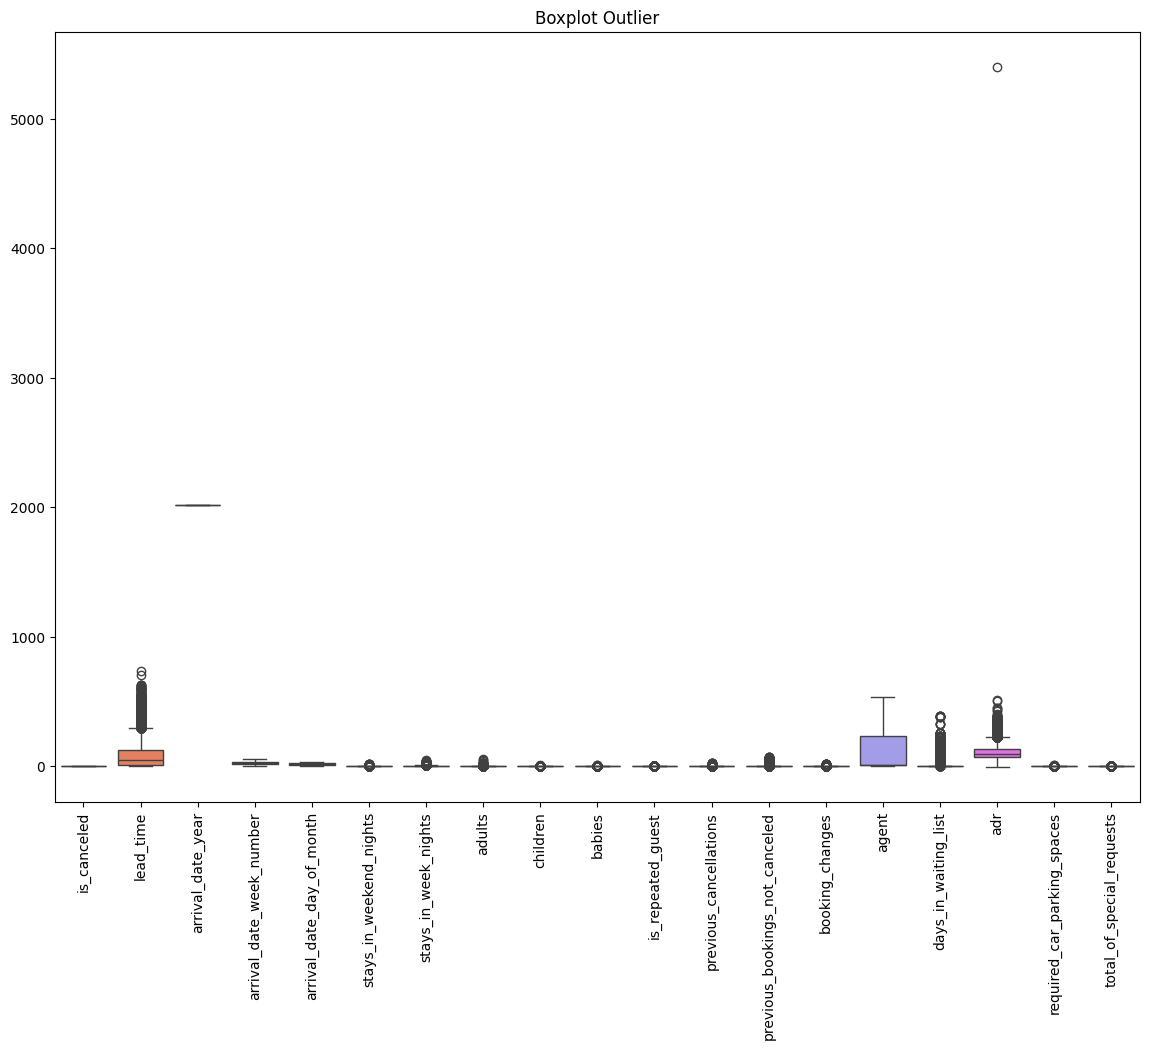

In [ ]:
# Cek outlier
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_prep.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplot Outlier')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_prep = df_prep[df_prep['lead_time'] <= 700]
df_prep = df_prep[df_prep['adr'] <= 500]
df_prep = df_prep[df_prep['days_in_waiting_list'] <= 300]

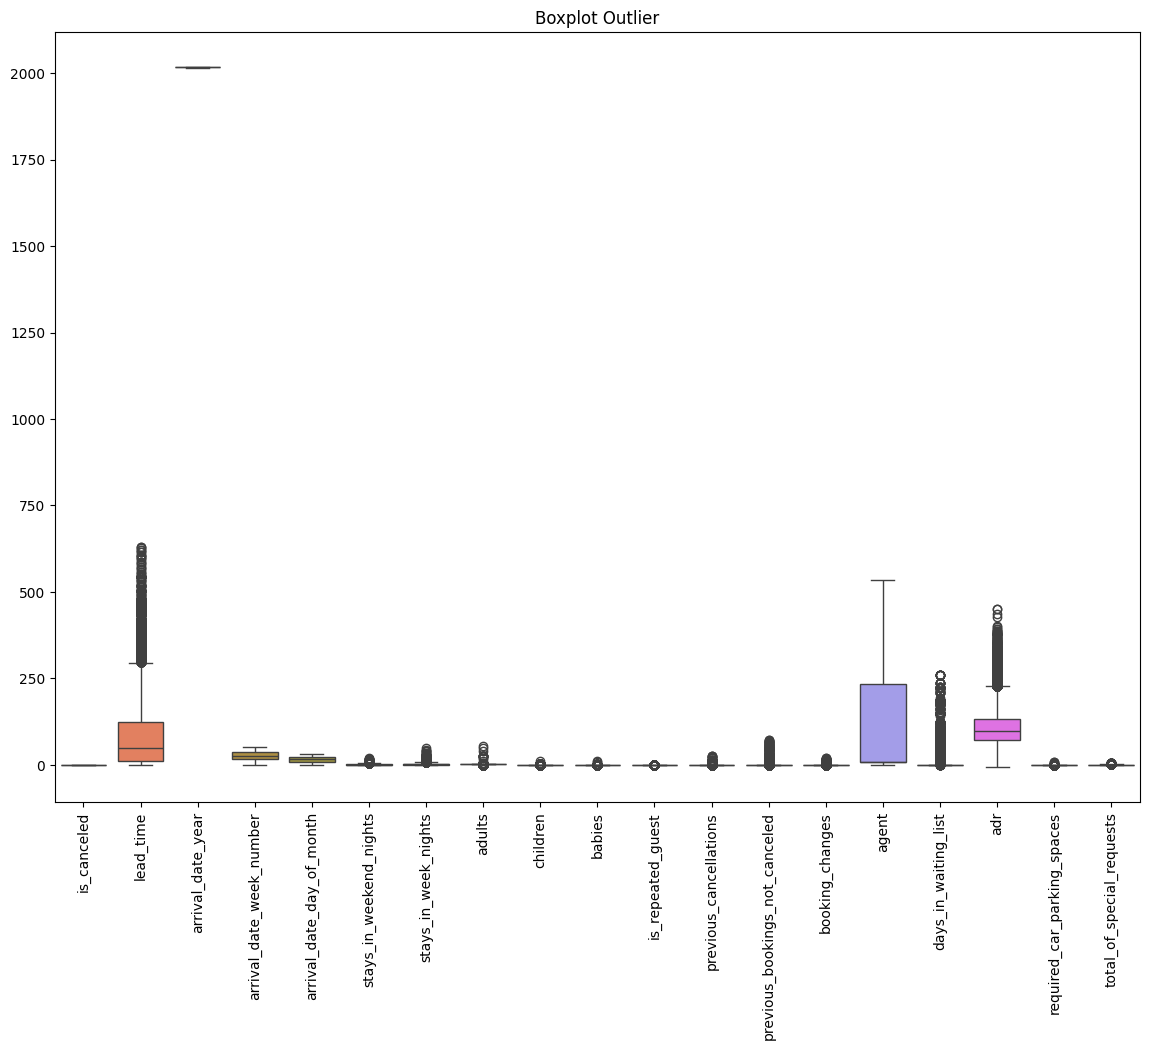

In [ ]:
# Cek outlier
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_prep.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplot Outlier')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_prep.shape

(87353, 31)

## Data Preparation

Encoding fitur kategorikal

In [ ]:
categorical_cols = df_prep.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_prep[col] = le.fit_transform(df_prep[col].astype(str))

Set target

In [ ]:
X = df_prep.drop(columns=['is_canceled'])
y = df_prep['is_canceled']

Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lakukan undersampling pada kelas mayoritas (not canceled)

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
not_canceled = df_train[df_train['is_canceled'] == 0]
canceled = df_train[df_train['is_canceled'] == 1]
not_canceled_sample = not_canceled.sample(len(canceled), random_state=42)
df_undersampled = pd.concat([not_canceled_sample, canceled])

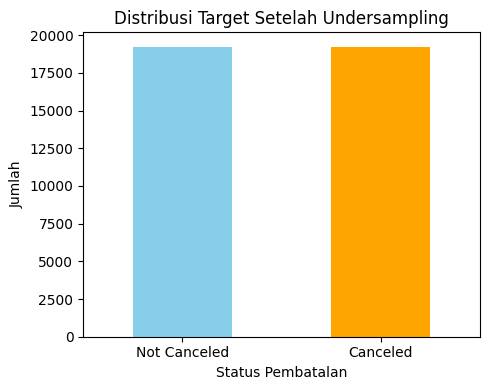

In [ ]:
plt.figure(figsize=(5, 4))
df_undersampled['is_canceled'].value_counts().sort_index().plot(
    kind='bar', color=['skyblue', 'orange']
)
plt.title("Distribusi Target Setelah Undersampling")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'], rotation=0)
plt.ylabel("Jumlah")
plt.xlabel("Status Pembatalan")
plt.tight_layout()
plt.show()

Set target baru

In [ ]:
X_train_under = df_undersampled.drop(columns=['is_canceled'])
y_train_under = df_undersampled['is_canceled']

Lakukan scaling pada data menggunakan standard scaler

In [ ]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

## Modelling

### Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_under_scaled, y_train_under)
y_pred_logreg = logreg.predict(X_test_scaled)

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_under, y_train_under)
y_pred_rf = rf.predict(X_test)

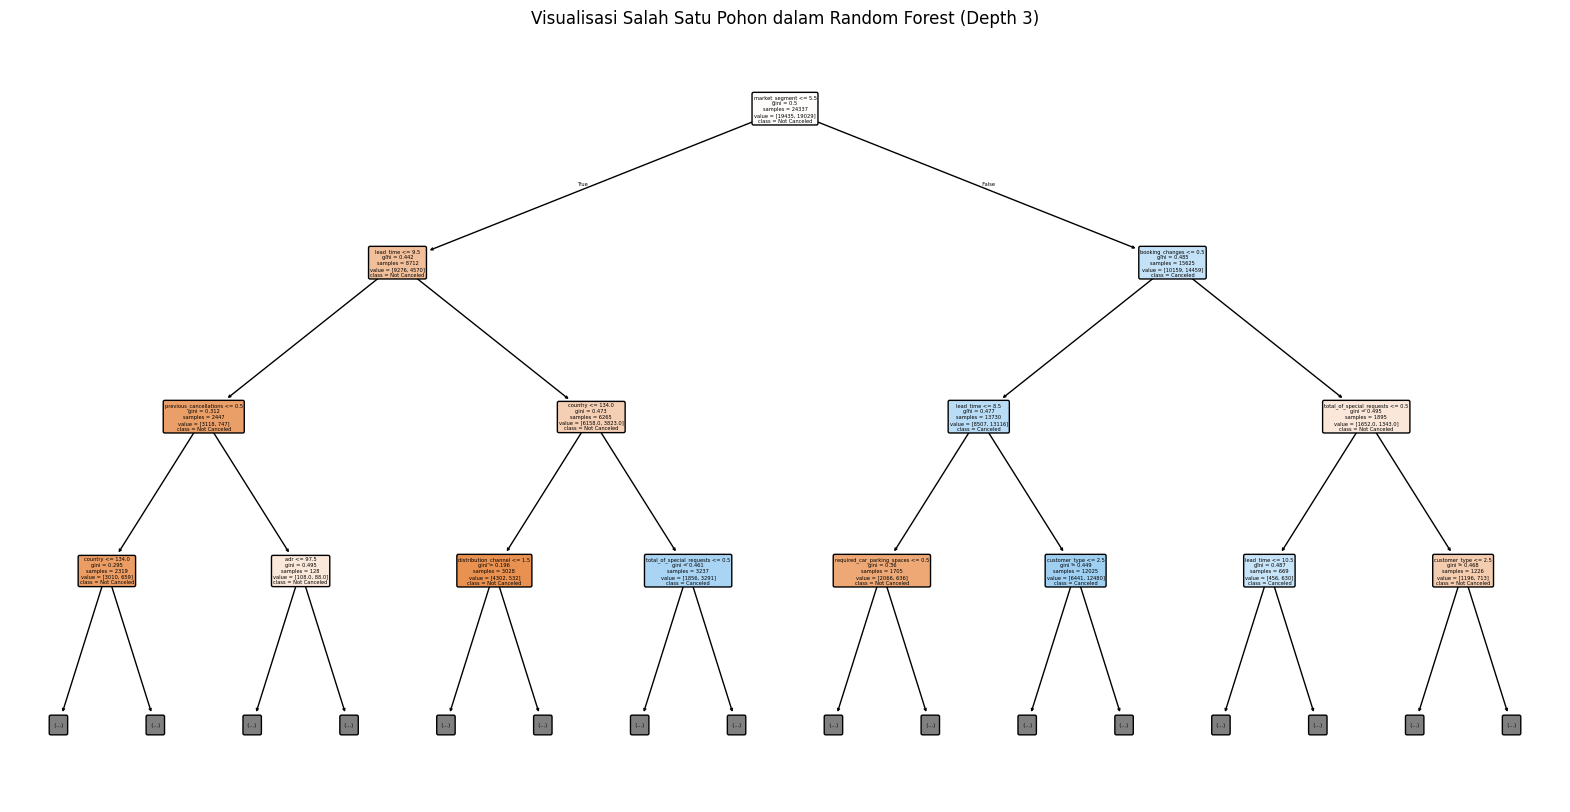

In [ ]:
estimator = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X_train_under.columns,
          class_names=['Not Canceled', 'Canceled'],
          filled=True,
          rounded=True,
          max_depth=3)
plt.title("Visualisasi Salah Satu Pohon dalam Random Forest (Depth 3)")
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf
})

comparison_df.sample(10)

,Actual,Predicted
15158,0,0
13582,1,1
14856,0,0
5918,0,0
13937,0,0
4678,0,0
2973,0,0
4264,0,0
12201,1,1
17103,0,0


## Evaluasi dan Visualisasi

In [ ]:
def evaluate_model(y_true, y_pred, title):
    print(f"\n Classification Report: {title}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Canceled','Canceled'],
                yticklabels=['Not Canceled','Canceled'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12687
           1       1.00      0.95      0.98      4784

    accuracy                           0.99     17471
   macro avg       0.99      0.98      0.98     17471
weighted avg       0.99      0.99      0.99     17471



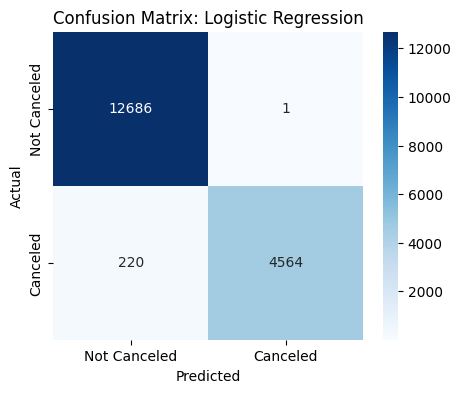

In [ ]:
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

Logistic Regression memberikan performa yang solid, namun tidak mampu menangkap semua kasus pembatalan secara sempurna.


 Classification Report: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12687
           1       1.00      1.00      1.00      4784

    accuracy                           1.00     17471
   macro avg       1.00      1.00      1.00     17471
weighted avg       1.00      1.00      1.00     17471



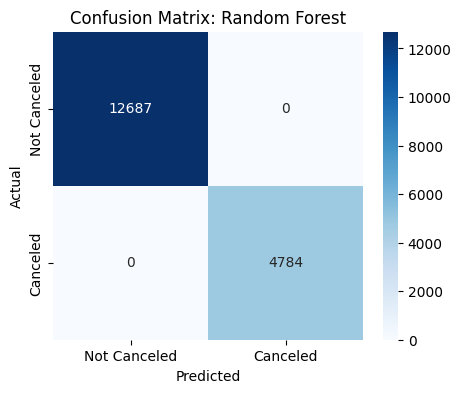

In [ ]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest menunjukkan performa sempurna pada data uji: tidak ada satu pun pembatalan atau non-pembatalan yang salah klasifikasi. Berdasarkan metrik evaluasi, model ini unggul mutlak dalam hal akurasi dan keseimbangan antar metrik.